Davies-Bouldin Index: 1.060424039992303


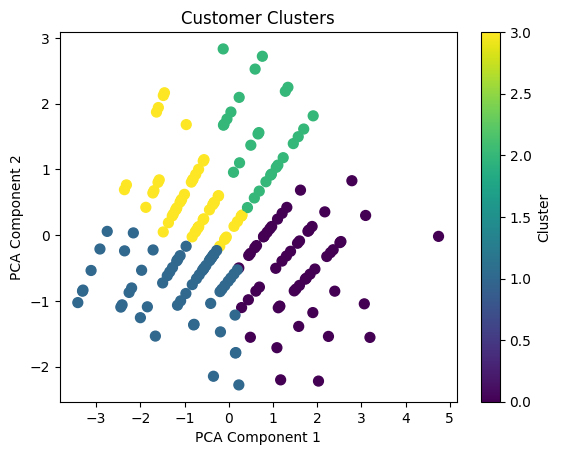

In [1]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import davies_bouldin_score
import pandas as pd
import matplotlib.pyplot as plt

merged_data = pd.read_csv('Processed_Data.csv')
customer_features = merged_data.groupby('CustomerID').agg(
    TotalSpending=('TotalValue', 'sum'),
    AvgTransactionValue=('TotalValue', 'mean'),
    TransactionFrequency=('TransactionID', 'count')
).reset_index()

scaler = StandardScaler()
scaled_data = scaler.fit_transform(customer_features.iloc[:, 1:])

kmeans = KMeans(n_clusters=4, random_state=42)
clusters = kmeans.fit_predict(scaled_data)
customer_features['Cluster'] = clusters
db_index = davies_bouldin_score(scaled_data, clusters)
print(f"Davies-Bouldin Index: {db_index}")

pca = PCA(n_components=2)
pca_data = pca.fit_transform(scaled_data)
plt.scatter(pca_data[:, 0], pca_data[:, 1], c=clusters, cmap='viridis', s=50)
plt.title('Customer Clusters')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.colorbar(label='Cluster')
plt.show()

customer_features.to_csv('Customer_Clusters.csv', index=False)
